In [204]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.metrics import classification_report   #计算准确率召回率F1

In [205]:
#数据处理
data = pd.read_csv("./winequality-red.csv", sep = ';')
data = np.array(data)
data = np.concatenate((np.ones((1599,1)),data),axis=1)  #加在行上
# dd = data[:,-1]
# dd = pd.Series(dd)
# dd = dd.value_counts()
# print(dd)
train_data = data[0:1280,:]
test_data = data[1280:1600,:]
train_data_x = train_data[:,0:12]
train_data_y = train_data[:,12:13]
print(train_data_y)
test_data_x = test_data[:,0:12]
test_data_y = test_data[:,12:13]

[[5.]
 [5.]
 [5.]
 ...
 [6.]
 [6.]
 [7.]]


In [206]:
#初始化w，b
def initial(dim):
    w  = np.zeros((dim, 1))
    b = 0
    return w, b
    #print(w)
    #print(w.shape)

def sigmoid(x):
    return 1.0/(1+np.exp(-x))

#initial(train_data_x.shape[1])
def logistics(X, y, w, b):
    num_of_data = X.shape[0]
    num_of_feature = X.shape[1]
    y_mat = sigmoid(np.dot(X, w)+ b)
    loss_total = np.sum(y*np.log(y_mat)+(1-y)*np.log(1-y_mat))
    loss_mean = -loss_total/num_of_data
    dw = np.dot(X.T, y-y_mat)/num_of_data
    db = sum(y-y_mat)/num_of_data
    #print(loss_mean)
    return y_mat, loss_mean, dw, db
#w,b = initial(train_data_x.shape[1])
#logistics(train_data_x,train_data_y,w,b)


In [207]:
##训练
def train(X, y, learning_rate=0.001, epochs=10000):
    epochs_loss = []
    w,b = initial(X.shape[1])
    for i in range(epochs):
        y_hat, loss, dw, db = logistics(X, y, w, b)
        w += learning_rate*dw
        b += learning_rate*db
        epochs_loss.append(loss)
        #if(i%5000 ==0):
            #learning_rate = learning_rate/2.0
            #print(learning_rate)
    params = {'w':w, 'b':b}
    grades = {'dw':dw, 'db':db}
    return epochs_loss, params, grades
    



In [208]:
#预测
def predict(X, params):
    w = params['w']
    b = params['b']
    y_pre = sigmoid(np.dot(X, w)+b)
    for i in range(len(y_pre)):
        if y_pre[i]>0.5:
            y_pre[i] = 1
        else:
            y_pre[i] =0
    
    return y_pre

              precision    recall  f1-score   support

         0.0       0.80      0.61      0.69       159
         1.0       0.69      0.84      0.76       160

    accuracy                           0.73       319
   macro avg       0.74      0.73      0.72       319
weighted avg       0.74      0.73      0.72       319



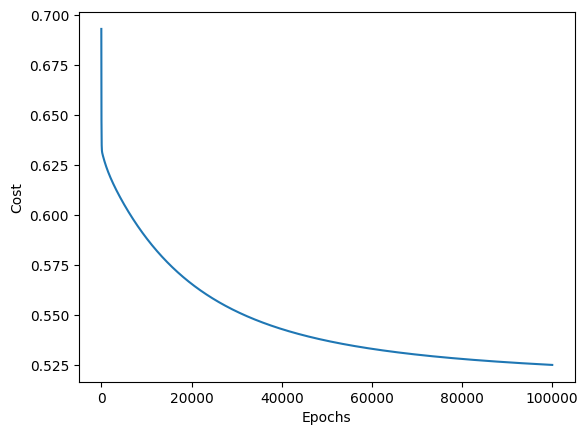

In [209]:
##主函数
#print(train_data_y)
for i in range(len(train_data_y)):
    if train_data_y[i] >=6:
        train_data_y[i]=1
    else:
        train_data_y[i]=0
for i in range(len(test_data_y)):
    if test_data_y[i] >=6:
        test_data_y[i]=1
    else:
        test_data_y[i]=0

#print(train_data_y)
# n = np.sum(train_data_y == 0)
# print(n)
learning_rate = 0.001
ephochs = 100000
train_loss, params, grads = train(train_data_x,train_data_y, learning_rate, ephochs)
pre_train_data_y = predict(train_data_x, params)
pre_data_y = predict(test_data_x, params)
ephochs_list = np.arange(0, ephochs,1)
train_loss = np.array(train_loss)
plt.plot(ephochs_list, train_loss)
plt.xlabel('Epochs')
plt.ylabel('Cost')
print(classification_report(test_data_y, pre_data_y))
# n = np.sum(pre_data_y == 0)
# print(n)
#print(pre_data_y)
#compare = np.concatenate((pre_data_y, test_data_y),axis=1)
#print(compare)
# count1 = 0
# count2 = 0
# for i in range(len(pre_train_data_y)):
#     if train_data_y[i] == pre_train_data_y[i] :
#         count1 = count1 +1
# print(count1)
# for i in range(len(pre_data_y)):
#     if test_data_y[i] == pre_data_y[i] :
#         count2 = count2 +1
# print(count2)